In [1]:
import tensorflow as tf
import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2023-02-27 10:44:52.265407: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-27 10:44:52.265444: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-27 10:44:53.772894: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-27 10:44:53.773018: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-02-27 10:44:53.773039: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape
#Each Label is between 0-9
train_labels
test_images.shape

(10000, 28, 28)

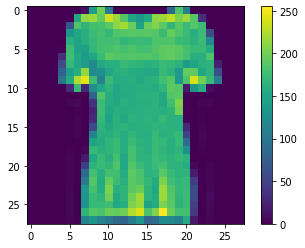

In [5]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()
#If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

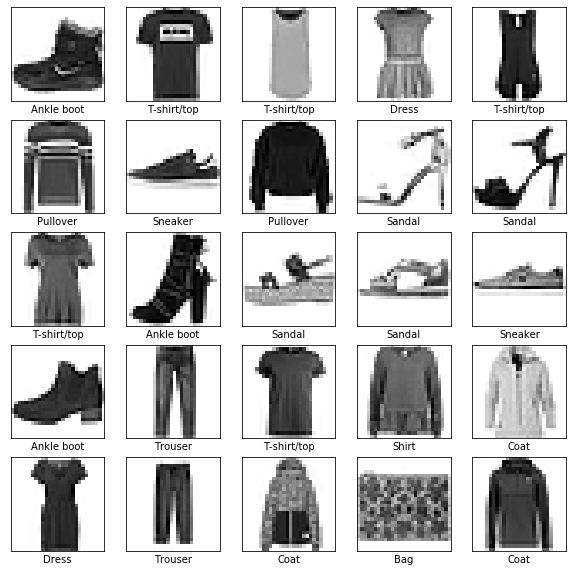

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(2, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5629 - accuracy: 0.3975
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0131 - accuracy: 0.6046
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9045 - accuracy: 0.6538
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8627 - accuracy: 0.6735
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8393 - accuracy: 0.6832
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8232 - accuracy: 0.6914
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8138 - accuracy: 0.6963
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8057 - accuracy: 0.6998
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8009 - accuracy: 0.7023
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.795

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 1570      
                                                                 
 dense_7 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


In [49]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.8170 - accuracy: 0.6997
Test accuracy: 0.6996999979019165


In [50]:
predictions = model.predict(test_images)
print(predictions[0])

313/313 [==============================] - 0s 1ms/step
[4.9275144e-07 1.3633345e-19 1.3852508e-07 3.1402773e-11 3.2409617e-11
 2.9937050e-01 2.3998932e-06 2.7383021e-01 9.8678805e-03 4.1692841e-01]


In [51]:
import pandas as pd
pred=pd.DataFrame(predictions)
import seaborn as sns

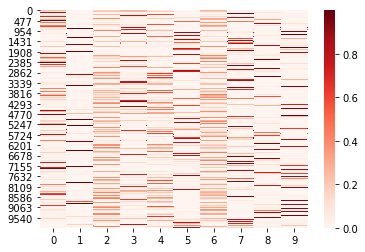

In [52]:
sns.heatmap(pred,cmap='Reds')

In [53]:
np.argmax(predictions, axis=1)

array([9, 8, 1, ..., 6, 1, 5])

In [54]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

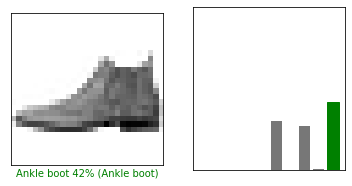

In [55]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


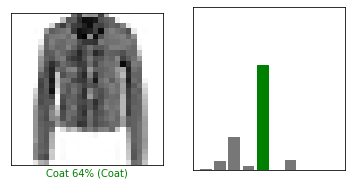

In [56]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

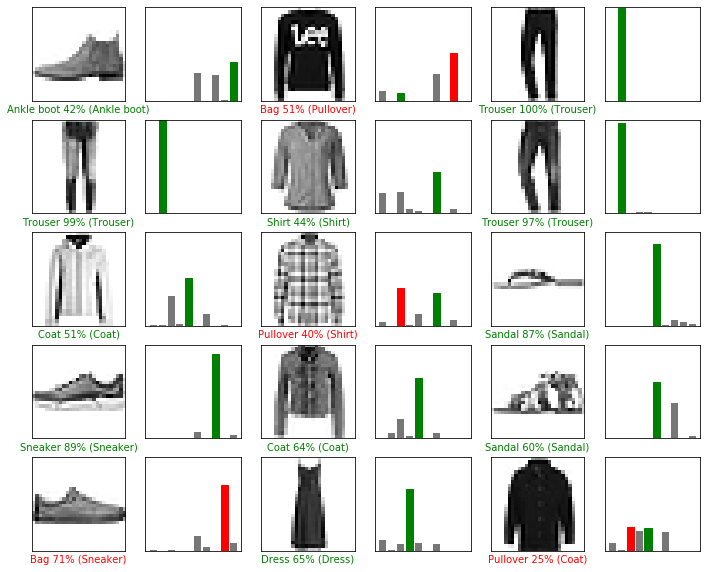

In [57]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [21]:
# single prediction
# Grab an image from the test dataset 
img = test_images[10]
print(img.shape)
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))
print(img.shape)
predictions_single = model.predict(img) 
print(predictions_single)

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 20ms/step
[[4.9786881e-04 9.1607887e-08 1.1866445e-01 4.4611963e-09 8.3571547e-01
  4.9664413e-07 4.5118373e-02 1.3635809e-09 1.4853732e-06 1.6608062e-06]]


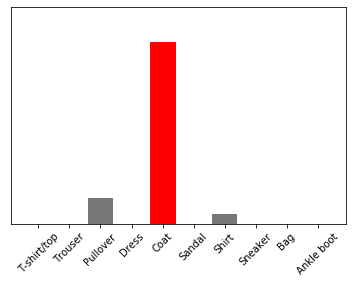

In [22]:
plot_value_array(0, predictions_single, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [33]:
prediction_result = np.argmax(predictions_single[0])
prediction_result

9